# Lab: Community Detection in Networks using Louvain and Leiden Algorithms

---

## Introduction

Community detection is a fundamental task in network analysis, aiming to partition a network into groups (communities) of nodes that are more densely connected internally than with the rest of the network. In this lab, we will explore two popular community detection algorithms:

- **Louvain Algorithm**
- **Leiden Algorithm**

We will apply these algorithms to **Zachary's Karate Club** graph, a classic social network dataset representing friendships between members of a karate club.

---

## Objectives

By the end of this lab, you will be able to:

- Understand the theory behind the Louvain and Leiden algorithms.
- Implement these algorithms to detect communities in a real-world network.
- Analyze and compare the performance of the algorithms.
- Visualize the detected communities.

---

## Part 1: Setup

First, we need to set up our environment by importing the necessary libraries.

### Task 1:

**Import the following libraries:**

- `networkx` as `nx` for network analysis.
- `matplotlib.pyplot` as `plt` for visualization.
- `random` for setting the seed.
- `community` for the Louvain algorithm.
- `leidenalg` and `igraph` for the Leiden algorithm.

We also need to install any missing packages.

In [1]:
# Install required packages
!pip install networkx matplotlib python-louvain leidenalg igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.9 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.5 MB/s eta 0:00:00


In [2]:
# Import libraries
import random
import networkx as nx
import matplotlib.pyplot as plt

# For Louvain algorithm
import community as community_louvain

# For Leiden algorithm
import igraph as ig
import leidenalg

# Seed random number generator for reproducibility
random.seed(0)

---

## Part 2: Loading Zachary's Karate Club Graph

The Karate Club graph represents friendships between 34 members of a karate club at a US university in the 1970s. Due to a conflict, the club split into two factions. This dataset is widely used to test community detection algorithms.

### Task 2:

**Load the Karate Club graph using NetworkX and visualize it.**

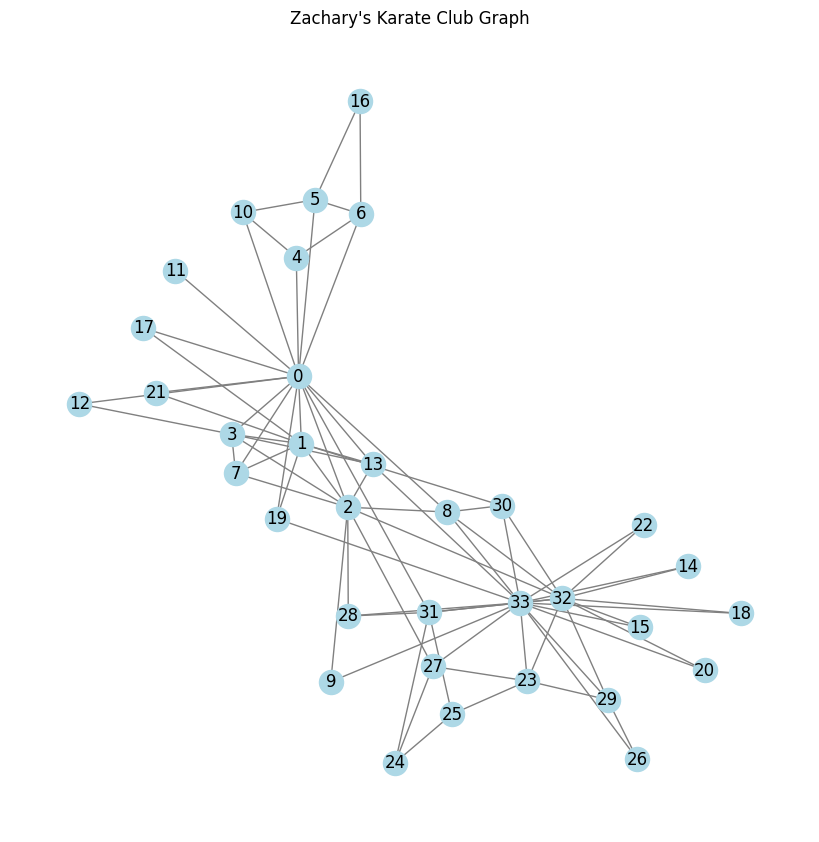

In [3]:
# Load the graph
G = nx.karate_club_graph()

# Generate positions for visualization
pos = nx.spring_layout(G, seed=1)

# Visualize the graph
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Zachary's Karate Club Graph")
plt.show()

---

## Part 3: Understanding Modularity

**Modularity** is a quality function that measures the strength of division of a network into communities. It compares the density of edges inside communities with edges between communities.

The modularity \( Q \) is defined as:

$$
Q = \frac{1}{2m} \sum_{i,j} \left( A_{ij} - \frac{k_i k_j}{2m} \right) \delta(c_i, c_j)
$$

Where:

- $A_{ij}$ is the adjacency matrix of the graph.
- $k_i$ and $k_j$ are the degrees of nodes $i$ and $j$.
- $m$ is the total number of edges.
- $\delta(c_i, c_j)$ is 1 if nodes $i$ and $j$ are in the same community, 0 otherwise.

---

## Part 4: Implementing the Louvain Algorithm

The **Louvain algorithm** is a greedy optimization method that attempts to maximize the modularity of a partition of the network.

### Task 3:

**Implement the Louvain algorithm to detect communities in the Karate Club graph.**

**Steps:**

1. Apply the Louvain algorithm.
2. Visualize the resulting communities.
3. Calculate and print the modularity score.

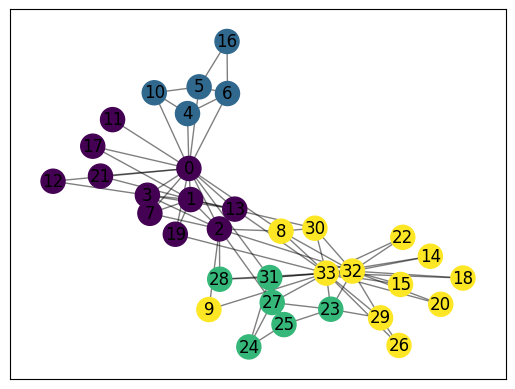

Modularity (Louvain): 0.44490358126721763


In [9]:
# Apply the Louvain algorithm
partition = community_louvain.best_partition(G)

# Function to draw the graph with communities
def draw_communities(G, partition, pos):
    cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=300,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos)
    plt.show()

# Visualize the communities
draw_communities(G, partition, pos)

# Calculate and print the modularity score
modularity = community_louvain.modularity(partition, G)
print(f"Modularity (Louvain): {modularity}")

---

## Part 5: Implementing the Leiden Algorithm

The **Leiden algorithm** is an improvement over the Louvain algorithm, addressing some of its limitations and often resulting in better partitions.

### Task 4:

**Implement the Leiden algorithm to detect communities in the Karate Club graph.**

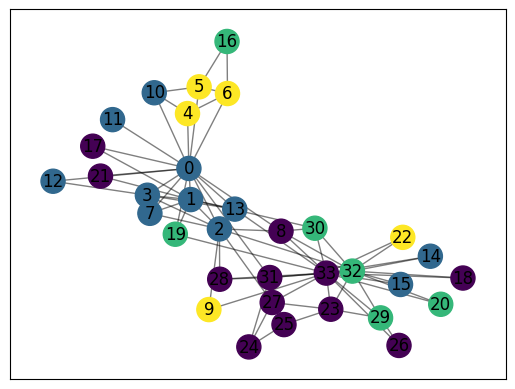

Modularity (Leiden): 0.41978961209730437


In [10]:
# Convert NetworkX graph to igraph
G_ig = ig.Graph.TupleList(G.edges(), directed=False)

# Apply the Leiden algorithm
partition_leiden = leidenalg.find_partition(G_ig, leidenalg.ModularityVertexPartition)

# Get the membership (community assignments)
membership = partition_leiden.membership

# Create a partition dictionary
partition_leiden_dict = {i: membership[i] for i in range(len(membership))}

# Visualize the communities
draw_communities(G, partition_leiden_dict, pos)

# Calculate and print the modularity score
modularity_leiden = partition_leiden.modularity
print(f"Modularity (Leiden): {modularity_leiden}")

---

## Part 6: Comparing the Algorithms

Now, let's compare the results of the two algorithms.

### Task 5:

**Compare the modularity scores and the detected communities.**

**Questions:**

- Which algorithm resulted in a higher modularity score?
- Do the detected communities align with the actual split of the club?

*Write your observations below:*

*Your observations here.*

---

## Part 7: Ground Truth Communities

We can compare the detected communities with the actual split of the karate club.

### Task 6:

**Visualize the ground truth communities based on the club's split.**

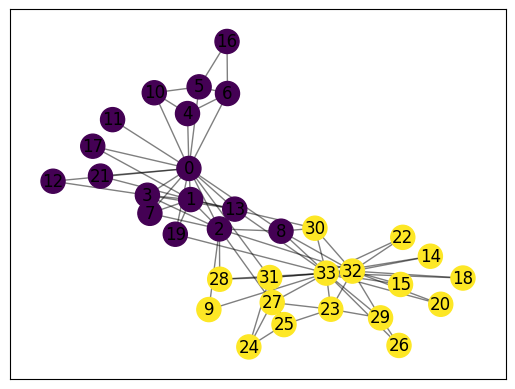

In [11]:
# Get the ground truth communities
club_labels = nx.get_node_attributes(G, 'club')
ground_truth = {'Mr. Hi': set(), 'Officer': set()}
for node, club in club_labels.items():
    ground_truth[club].add(node)

# Create a partition dictionary for ground truth
ground_partition = {}
for cid, (club, nodes) in enumerate(ground_truth.items()):
    for node in nodes:
        ground_partition[node] = cid

# Visualize the ground truth communities
draw_communities(G, ground_partition, pos)

---

## Part 8: Adjusting the Resolution Parameter

The resolution parameter in the modularity function can affect the size and number of communities detected.

### Task 7:

**Experiment with different resolution parameters and observe the effects on community detection.**

**Steps:**

1. Run the Leiden algorithm with different values of the resolution parameter (e.g., 0.5, 1, 1.5).
2. Visualize and compare the resulting communities.

**Theory:**

The modularity function with resolution parameter \( \gamma \):

\[
Q = \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \gamma \frac{k_i k_j}{2m} \right] \delta(c_i, c_j)
\]

Higher values of \( \gamma \) favor smaller communities.


Gamma (resolution parameter): 0.5


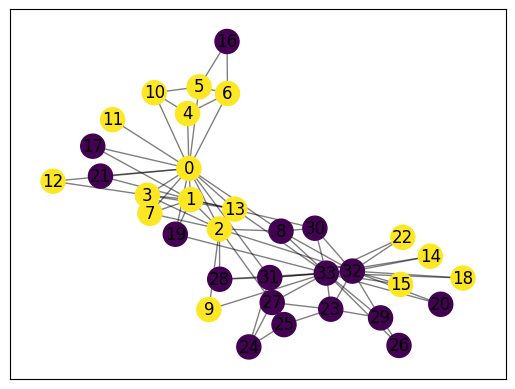

Modularity: 0.3717948717948718

Gamma (resolution parameter): 1.0


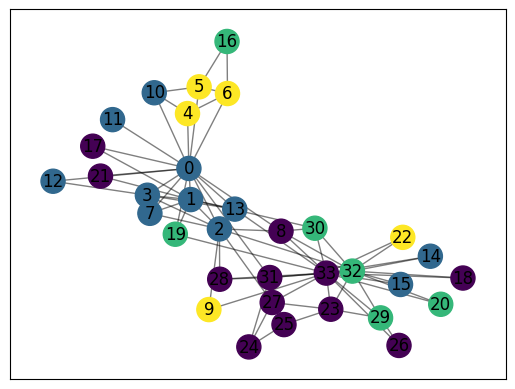

Modularity: 0.41978961209730437

Gamma (resolution parameter): 1.5


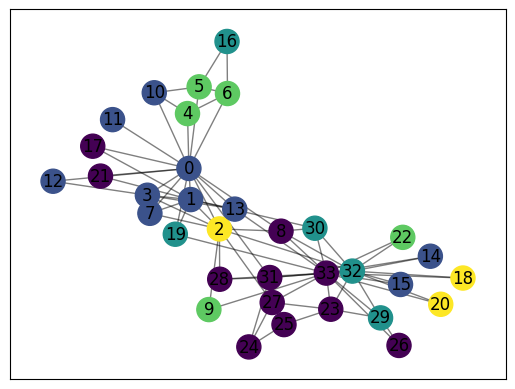

Modularity: 0.40622945430637736


In [7]:
# Define different gamma values
gamma_values = [0.5, 1.0, 1.5]

for gamma in gamma_values:
    print(f"\nGamma (resolution parameter): {gamma}")
    # Apply Leiden algorithm with different gamma
    partition_leiden_gamma = leidenalg.find_partition(
        G_ig, leidenalg.RBConfigurationVertexPartition, resolution_parameter=gamma)
    
    # Get the membership
    membership_gamma = partition_leiden_gamma.membership
    
    # Create partition dictionary
    partition_gamma_dict = {i: membership_gamma[i] for i in range(len(membership_gamma))}
    
    # Visualize the communities
    draw_communities(G, partition_gamma_dict, pos)
    
    # Print modularity score
    modularity_gamma = partition_leiden_gamma.modularity
    print(f"Modularity: {modularity_gamma}")

**Questions:**

- How does changing \( \gamma \) affect the number and size of communities?
- What value of \( \gamma \) gives the best alignment with the ground truth?

*Write your observations below:*

*Your observations here.*

---

## Part 9: Runtime Comparison

For larger graphs, the Leiden algorithm is known to be faster than the Louvain algorithm.

### Task 8:

**Measure and compare the runtime of the Louvain and Leiden algorithms on the Karate Club graph.**

In [8]:
import time

# Time the Louvain algorithm
start_time = time.time()
partition = community_louvain.best_partition(G)
louvain_time = time.time() - start_time

# Time the Leiden algorithm
start_time = time.time()
partition_leiden = leidenalg.find_partition(G_ig, leidenalg.ModularityVertexPartition)
leiden_time = time.time() - start_time

print(f"Louvain algorithm runtime: {louvain_time:.6f} seconds")
print(f"Leiden algorithm runtime: {leiden_time:.6f} seconds")

Louvain algorithm runtime: 0.000963 seconds
Leiden algorithm runtime: 0.000777 seconds


**Questions:**

- Which algorithm was faster?
- How significant is the difference in runtime for this small graph?

*Write your observations below:*

*Your observations here.*

---

## Conclusion

In this lab, you have:

- Explored the theory behind the Louvain and Leiden community detection algorithms.
- Applied both algorithms to a real-world network.
- Compared the detected communities with the actual community structure.
- Investigated the impact of the resolution parameter on community detection.
- Compared the runtime performance of the two algorithms.

---

## Reflection Questions

1. **Algorithm Selection:** Based on your observations, which algorithm would you prefer for large-scale networks and why?

2. **Resolution Parameter:** How does the resolution parameter influence the modularity optimization, and what are its practical implications?

3. **Community Detection Challenges:** What are some challenges associated with community detection in networks, and how might they be addressed?

*Provide detailed answers to these questions.*